<a href="https://colab.research.google.com/github/lakhani-haya/Retail-Forecasting-Project/blob/main/RetailForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Forecasting Retail Sales by Product Category using Facebook Prophet
# This model aggregates daily sales data per product category and applies the Prophet forecasting model
# to predict sales for the next 30 days. It helps identify future demand trends and supports inventory planning.
!pip install prophet

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

In [8]:
df = pd.read_csv('/retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby(['Date', 'Product Category'])['Total Amount'].sum().reset_index()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvrndb1/dzdi3o4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvrndb1/p4lpz6z_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34599', 'data', 'file=/tmp/tmprpvrndb1/dzdi3o4v.json', 'init=/tmp/tmprpvrndb1/p4lpz6z_.json', 'output', 'file=/tmp/tmprpvrndb1/prophet_modelxg35hxc5/prophet_model-20250505201618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:16:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


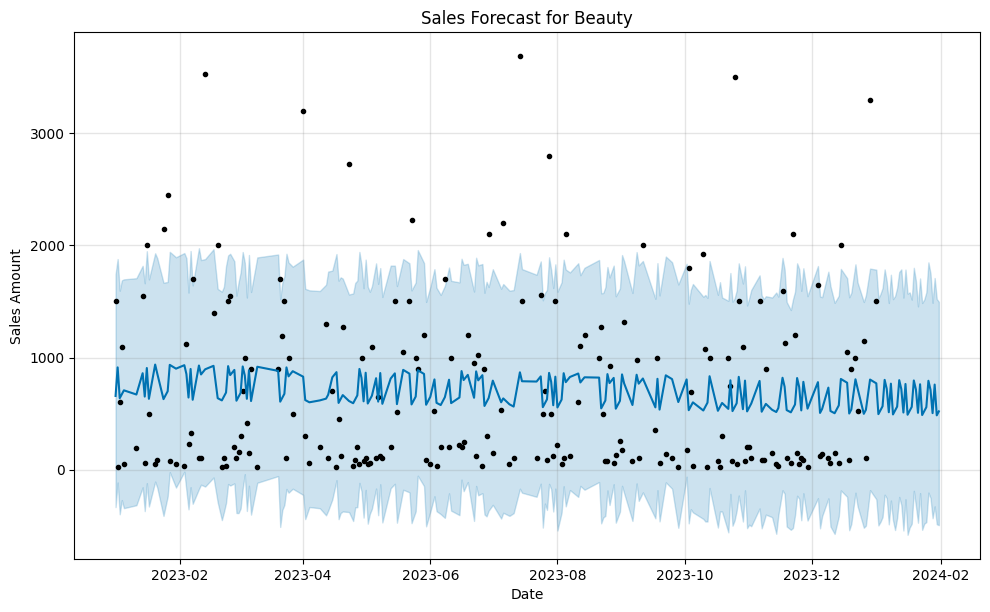

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvrndb1/a6m2iiyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvrndb1/rk5ccx9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9334', 'data', 'file=/tmp/tmprpvrndb1/a6m2iiyt.json', 'init=/tmp/tmprpvrndb1/rk5ccx9z.json', 'output', 'file=/tmp/tmprpvrndb1/prophet_modelxh6k5sg8/prophet_model-20250505201619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


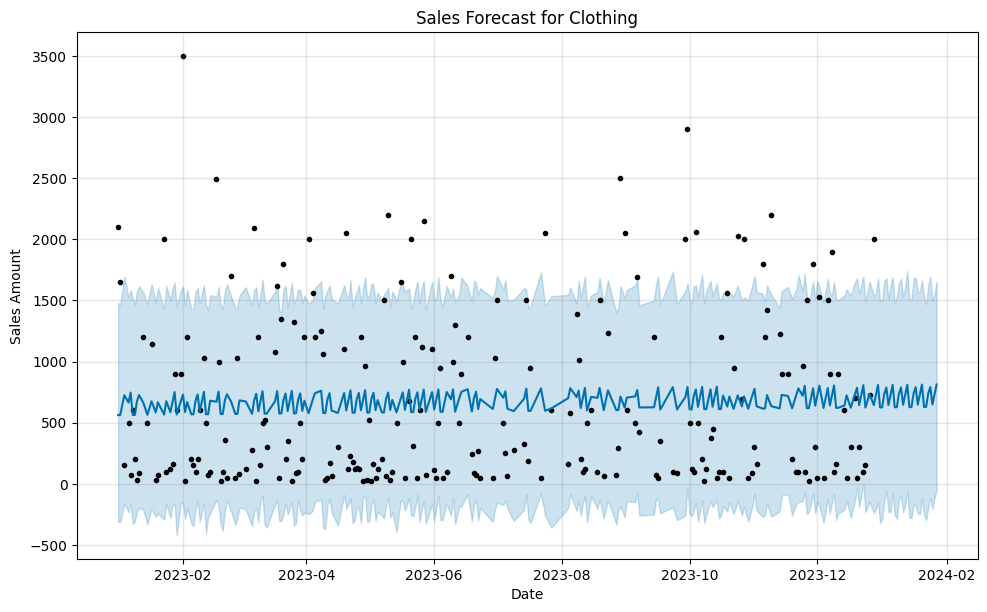

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvrndb1/ufzwxziq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprpvrndb1/zn7xa1em.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5659', 'data', 'file=/tmp/tmprpvrndb1/ufzwxziq.json', 'init=/tmp/tmprpvrndb1/zn7xa1em.json', 'output', 'file=/tmp/tmprpvrndb1/prophet_modelagd3sa43/prophet_model-20250505201619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


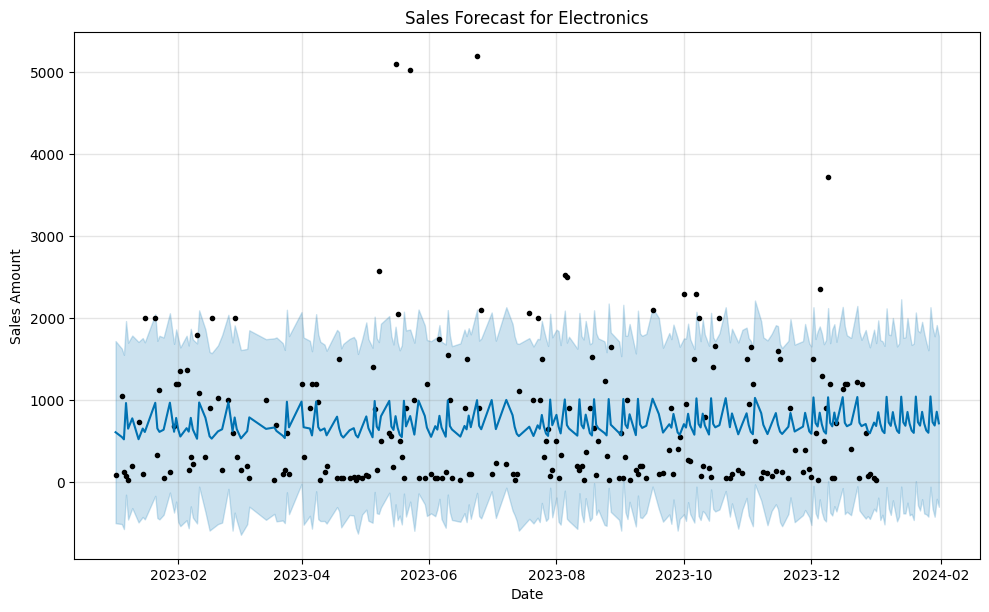

In [9]:
output_dir = "category_forecasts"
os.makedirs(output_dir, exist_ok=True)

#unique product categories
categories = daily_sales['Product Category'].unique()

#looping through each category and forecast
for cat in categories:
    cat_data = daily_sales[daily_sales['Product Category'] == cat]
    cat_data = cat_data.rename(columns={'Date': 'ds', 'Total Amount': 'y'})


    if len(cat_data) >= 20:
        model = Prophet()
        model.fit(cat_data)

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)


        fig = model.plot(forecast)
        plt.title(f"Sales Forecast for {cat}")
        plt.xlabel("Date")
        plt.ylabel("Sales Amount")
        plt.show()


        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
            f"{output_dir}/forecast_{cat}.csv", index=False
        )